In [1]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
con = sqlite3.connect("baseline_nexp2_v1.7.1_10yrs.db")
df_171 = pd.read_sql_query("SELECT * from summaryallprops", con)


In [3]:
con = sqlite3.connect("retro_baseline_v2.0_10yrs.db")
df_retro = pd.read_sql_query("SELECT * from observations", con)


In [4]:
np.abs((df_retro['fiveSigmaDepth'] - df_171['fiveSigmaDepth'])).max()

2.920021923813465e-06

In [5]:
df_retro.columns

Index(['observationId', 'fieldRA', 'fieldDec', 'observationStartMJD',
       'flush_by_mjd', 'visitExposureTime', 'filter', 'rotSkyPos',
       'numExposures', 'airmass', 'seeingFwhm500', 'seeingFwhmEff',
       'seeingFwhmGeom', 'skyBrightness', 'night', 'slewTime', 'visitTime',
       'slewDistance', 'fiveSigmaDepth', 'altitude', 'azimuth', 'paraAngle',
       'cloud', 'moonAlt', 'sunAlt', 'note', 'fieldId', 'proposalId',
       'block_id', 'observationStartLST', 'rotTelPos', 'moonAz', 'sunAz',
       'sunRA', 'sunDec', 'moonRA', 'moonDec', 'moonDistance', 'solarElong',
       'moonPhase', 'cummTelAz'],
      dtype='object')

In [2]:
from rubin_sim.maf.mafContrib import (TdePopMetric, generateTdePopSlicer)
import rubin_sim.maf.metrics as metrics
import rubin_sim.maf.slicers as slicers
import rubin_sim.maf.plots as plots
import rubin_sim.maf.metricBundles as mb
import rubin_sim.maf.db as db

In [3]:
bundleList = []
sql=''
metric = TdePopMetric()
slicer = generateTdePopSlicer()
plotDict = {'reduceFunc': np.sum, 'nside': 128}
plotFuncs = [plots.HealpixSkyMap()]
bundle = mb.MetricBundle(metric, slicer, sql,
                         plotDict=plotDict,plotFuncs=plotFuncs,
                         summaryMetrics=[metrics.MeanMetric(maskVal=0)])
bundleList.append(bundle)

In [4]:
dbFile = 'baseline_nexp2_v1.7.1_10yrs.db'
conn = db.OpsimDatabase(dbFile)
outDir='temp'
resultsDb = db.ResultsDb(outDir=outDir)

In [5]:
bd = mb.makeBundlesDictFromList(bundleList)
bg = mb.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
bg.runAll()

Querying database SummaryAllProps with no constraint for columns ['fiveSigmaDepth', 'fieldRA', 'filter', 'rotSkyPos', 'fieldDec', 'observationStartMJD', 'night'].
Found 2044984 visits
Running:  ['opsim_TDEsPopMetric_USER']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


Plotting figures with "" constraint now.


/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/plots/plotHandler.py:518: UserWarning: Cannot plot object metric values with this plotter.
  warnings.warn('Cannot plot object metric values with this plotter.')
/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passi

Plotting complete.


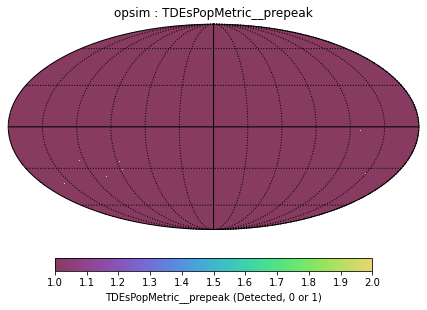

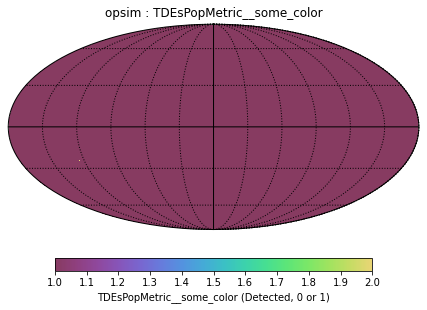

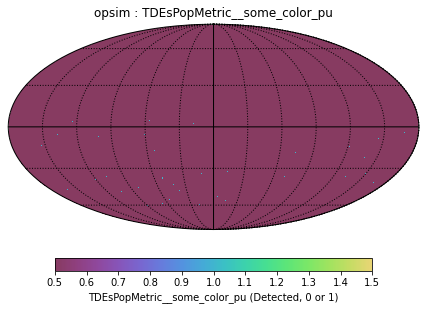

In [6]:
bg.plotAll(closefigs=False)

In [7]:
for key in bd:
    print(bd[key].summaryValues)

{}
{'Mean': 0.2126}
{'Mean': 0.0563}
{'Mean': 0.0105}


In [8]:
dbFile = 'retro_baseline_v2.0_10yrs.db'
conn = db.OpsimDatabase(dbFile)
outDir='temp'
resultsDb = db.ResultsDb(outDir=outDir)

In [9]:
bundleList = []
sql=''
metric = TdePopMetric()
slicer = generateTdePopSlicer()
plotDict = {'reduceFunc': np.sum, 'nside': 128}
plotFuncs = [plots.HealpixSkyMap()]
bundle = mb.MetricBundle(metric, slicer, sql,
                         plotDict=plotDict,plotFuncs=plotFuncs,
                         summaryMetrics=[metrics.MeanMetric(maskVal=0)])
bundleList.append(bundle)

Querying database observations with no constraint for columns ['fiveSigmaDepth', 'fieldRA', 'filter', 'rotSkyPos', 'fieldDec', 'observationStartMJD', 'night'].
Found 2044984 visits
Running:  ['opsim_TDEsPopMetric_USER']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "" constraint now.


/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/plots/plotHandler.py:518: UserWarning: Cannot plot object metric values with this plotter.
  warnings.warn('Cannot plot object metric values with this plotter.')
/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passi

Plotting complete.


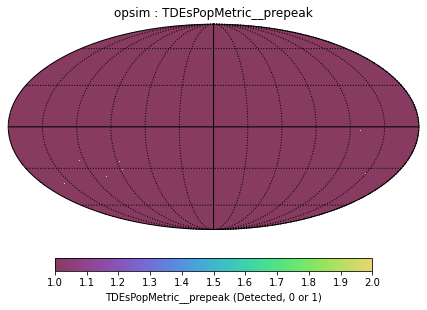

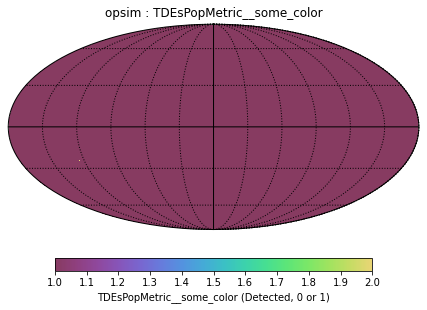

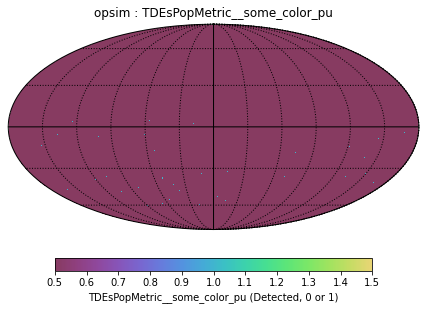

In [10]:
bd = mb.makeBundlesDictFromList(bundleList)
bg = mb.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
bg.runAll()
bg.plotAll(closefigs=False)

In [11]:
for key in bd:
    print(bd[key].summaryValues)

{}
{'Mean': 0.2126}
{'Mean': 0.0563}
{'Mean': 0.0105}
